In [1]:
from os import listdir
from os.path import isfile, join

import seaborn as sns
import matplotlib.pyplot as plt
from utils.rodents_routine import params_to_J_scalar, params_to_P_scalar, params_to_w_scalar

import pandas as pd

In [2]:
plt.rcParams.update({'font.size': 22})
sns.set(font_scale=2.4)

In [3]:
path = r"/Users/paopao_ch/Documents/projects/v1_modelling/results/backprop1000NewLossFunctionHeterFF/method_validation"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [12]:
data = []
for file in files:
    with open(f"{path}/{file}", 'r') as f:
        count = 0
        for line in f:
            if line[0] == '[':
                if count == 0:
                    J_array = eval(line.strip())
                    count += 1
                elif count == 1:
                    P_array = eval(line.strip())
                    count +=1
                else:
                    w_array = eval(line.strip())
                    count = 0
            if line[:5] == "loss:":
                loss = float(line.strip().split(' ')[-1])
            if line[:9] == "heter_ff:":
                heter_ff = eval(line.strip().split(' ')[-1])[0]
        datum = {"$J_{EE}$": params_to_J_scalar(J_array[0]) / (800 ** 0.5), 
                 "$J_{EI}$": params_to_J_scalar(J_array[1]) / (200 ** 0.5), 
                 "$J_{IE}$": params_to_J_scalar(J_array[2]) / (800 ** 0.5),
                 "$J_{II}$": params_to_J_scalar(J_array[3]) / (200 ** 0.5),
                 "$P_{EE}$": params_to_P_scalar(P_array[0]),
                 "$P_{EI}$": params_to_P_scalar(P_array[1]),
                 "$P_{IE}$": params_to_P_scalar(P_array[2]),
                 "$P_{II}$": params_to_P_scalar(P_array[3]),
                 "$w_{EE}$": params_to_w_scalar(w_array[0]),
                 "$w_{EI}$": params_to_w_scalar(w_array[1]),
                 "$w_{IE}$": params_to_w_scalar(w_array[2]),
                 "$w_{II}$": params_to_w_scalar(w_array[3]),
                 "$q_{ff}$": heter_ff,
                 "loss": loss}
        
        if loss < 0.04:
            data.append(datum)

In [13]:
df = pd.DataFrame(data)
print(len(df))
for datum in data[:5]:
    print(datum)
df.head()

28
{'$J_{EE}$': 0.032275176963064284, '$J_{EI}$': 2.5876060074951854, '$J_{IE}$': 1.3921309199727687, '$J_{II}$': 0.6946687949408147, '$P_{EE}$': 0.024124165879752715, '$P_{EI}$': 0.016474955382205145, '$P_{IE}$': 0.023394845597034013, '$P_{II}$': 0.03205455717309457, '$w_{EE}$': 21.27225120164448, '$w_{EI}$': 8.44343355925951, '$w_{IE}$': 22.69077500039404, '$w_{II}$': 97.25724406632114, '$q_{ff}$': 0.301494, 'loss': 0.022220682352781296}
{'$J_{EE}$': 0.019584757191648167, '$J_{EI}$': 0.22325652391753195, '$J_{IE}$': 0.040521524898644815, '$J_{II}$': 0.24798811514188362, '$P_{EE}$': 0.5386820012293734, '$P_{EI}$': 0.4276007591836803, '$P_{IE}$': 0.5808704223232828, '$P_{II}$': 0.5118379144473824, '$w_{EE}$': 20.306667928713907, '$w_{EI}$': 170.8638502671558, '$w_{IE}$': 133.600902234573, '$w_{II}$': 58.37160097474241, '$q_{ff}$': 0.640846, 'loss': 0.018346499651670456}
{'$J_{EE}$': 0.029896171787702912, '$J_{EI}$': 0.868622766316551, '$J_{IE}$': 1.3925932994986476, '$J_{II}$': 2.68093

,$J_{EE}$,$J_{EI}$,$J_{IE}$,$J_{II}$,$P_{EE}$,$P_{EI}$,$P_{IE}$,$P_{II}$,$w_{EE}$,$w_{EI}$,$w_{IE}$,$w_{II}$,$q_{ff}$,loss
0,0.032275,2.587606,1.392131,0.694669,0.024124,0.016475,0.023395,0.032055,21.272251,8.443434,22.690775,97.257244,0.301494,0.022221
1,0.019585,0.223257,0.040522,0.247988,0.538682,0.427601,0.580870,0.511838,20.306668,170.863850,133.600902,58.371601,0.640846,0.018346
2,0.029896,0.868623,1.392593,2.680934,0.562484,0.043766,0.022591,0.018084,57.861674,83.765262,46.753939,82.215332,0.085858,0.014131
3,0.192219,0.494021,0.987084,2.327499,0.001524,0.018492,0.124129,0.216617,173.198440,70.653375,103.948902,99.089194,0.318014,0.013239
4,0.019585,0.223257,0.040522,0.247988,0.538682,0.427601,0.580870,0.511838,20.306668,170.863850,133.600902,58.371601,0.640846,0.018346


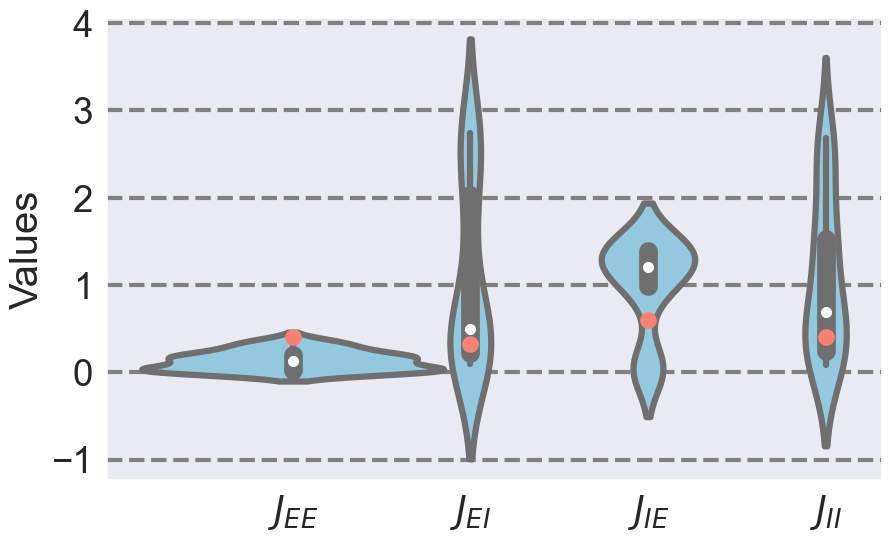

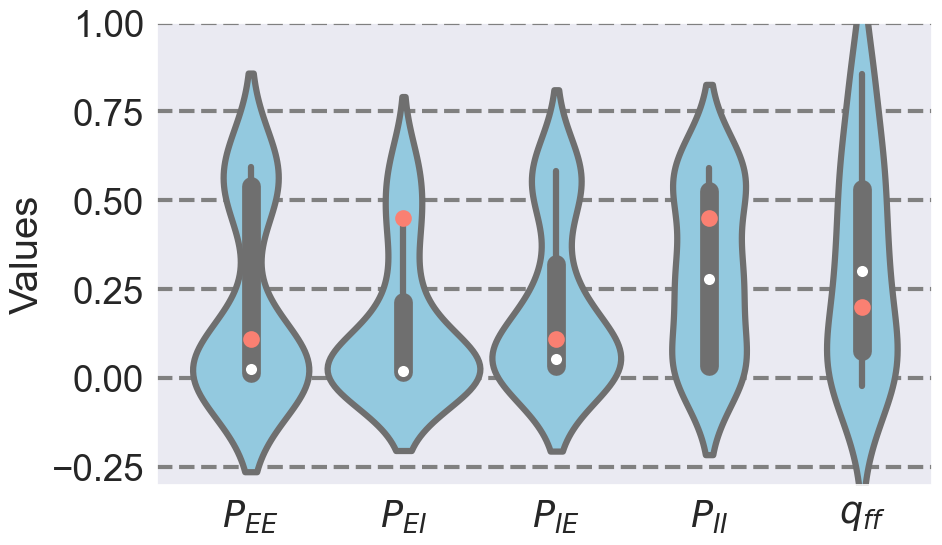

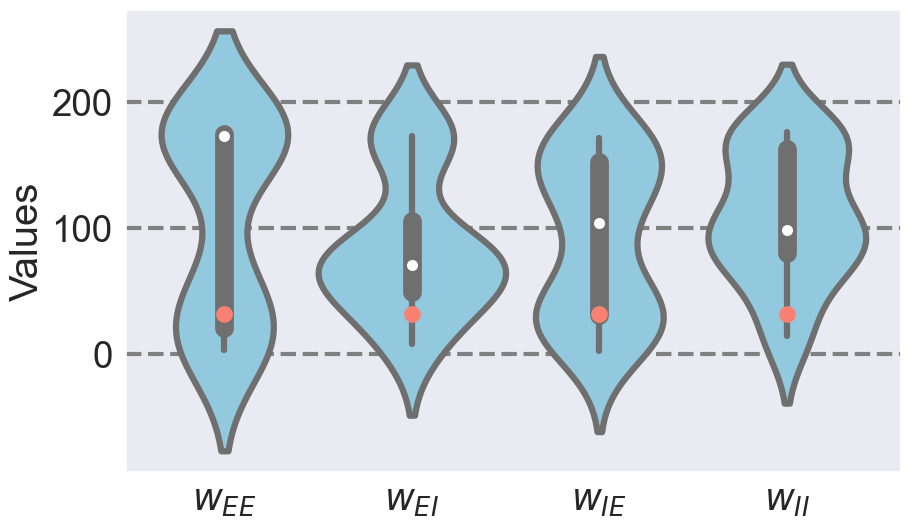

In [19]:
width = 1
linewidth = 4.5
linewidth_grid = 3

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$J_{EE}$", "$J_{EI}$", "$J_{IE}$", "$J_{II}$"]], color='skyblue', width=1.7, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [11.31 / (800 ** 0.5), 4.52 / (200 ** 0.5), 16.97 / (800 ** 0.5), 5.66 / (200 ** 0.5)]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$P_{EE}$", "$P_{EI}$", "$P_{IE}$", "$P_{II}$", "$q_{ff}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.11, 0.45, 0.11, 0.45, 0.2]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.ylim(-0.3,1)
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$w_{EE}$", "$w_{EI}$", "$w_{IE}$", "$w_{II}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [32, 32, 32, 32]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

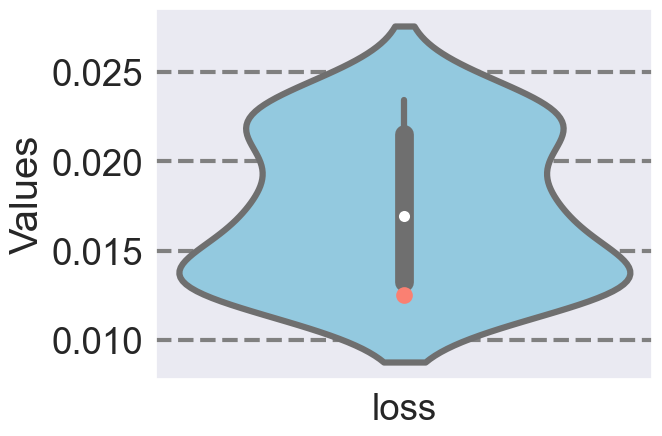

In [16]:
ax = sns.violinplot(data=df[["loss"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.012507867068052292]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', color='gray', linewidth=linewidth_grid)
plt.xlabel('')
plt.ylabel('Values')
plt.show()